In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

In [2]:
def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [3]:
def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

In [4]:
def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

In [5]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D_in, H),
            nn.Sigmoid(),
            nn.Linear(H, D_out)
        )

    def forward(self, x):
        return self.net(x)

In [6]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            useful_stuff['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    return useful_stuff

In [7]:
train_dataset = dsets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [8]:
criterion = nn.CrossEntropyLoss()

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [10]:
input_dim = 28 * 28 # mnist image size
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [11]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

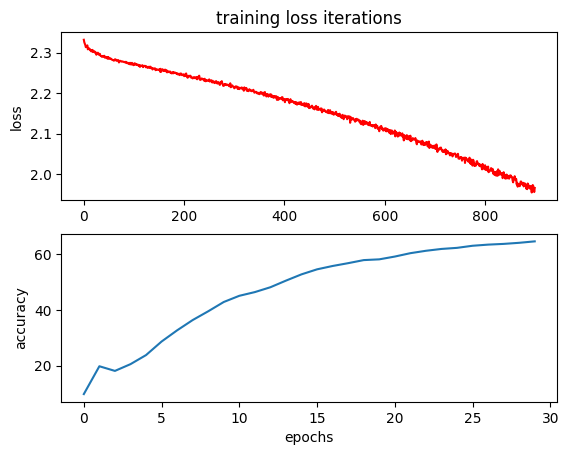

In [13]:
plot_accuracy_loss(training_results)

Pred: 7 ~ Actual: 4


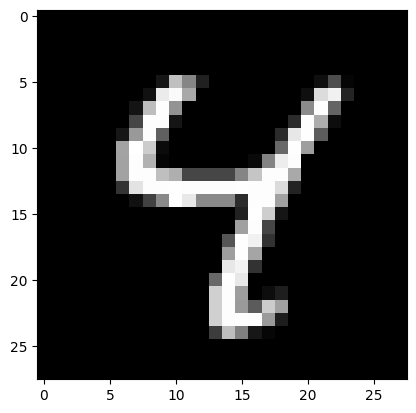

Pred: 6 ~ Actual: 5


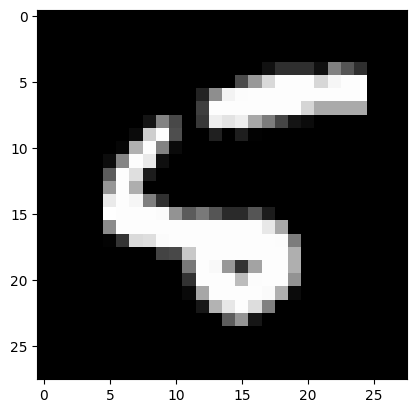

Pred: 7 ~ Actual: 9


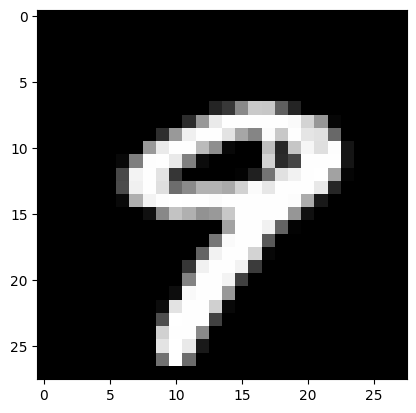

Pred: 0 ~ Actual: 6


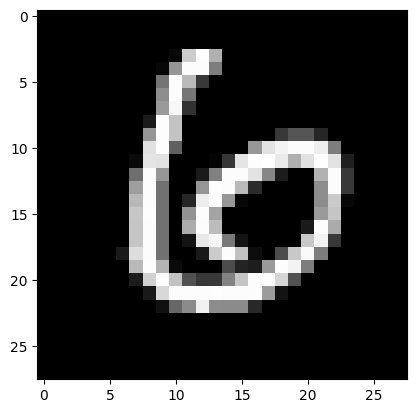

Pred: 3 ~ Actual: 5


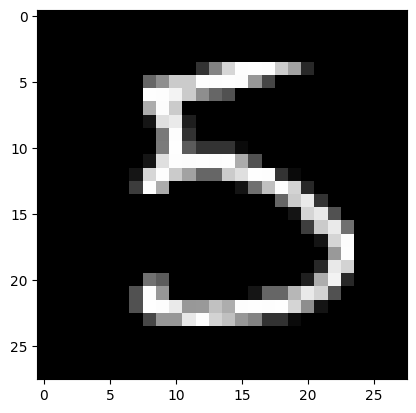

In [19]:
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if yhat != y:
        print(f"Pred: {yhat[0]} ~ Actual: {y}")
        show_data(x)
        count += 1
    if count >= 5:
        break